# Regressão: Modelos Supervisionados

In [2]:
import pandas as pd

In [3]:
def predict_table(y, y_pred, columns, residual=False):
    """Tabela de previsão e cálculo de resíduo do modelo

    Args:
        y (pd.DataFrame): variável resposta
        y_pred (.predict): predição do modelo ajustado dos regressores
        columns (list): nome das colunas Real e Previsto
        residual (bool, optional): cálculo do residual dos regressores. Defaults to False.

    Returns:
        pred(pd.DataFrame): base com predição do modelo ajustado
    """  
    
    import pandas as pd
    
    pred = pd.concat([y, pd.Series(y_pred)], axis=1)
    pred.columns = columns

    if residual is True:
        pred['Res'] = pred[columns[0]] - pred[columns[1]]

    return pred

In [4]:
df = pd.read_excel('https://github.com/bruna-calistrate/Regression-SupervisedModels-Course/blob/main/dataset/Database.xlsx?raw=true', index_col=None)


## Entendimento dos dados
As colunas representam o valor investido em cada canal de marketing

In [5]:
df.head()

,Branding,DPA 1,DPA 3,DRA 1,DRA 3,Display 1,Display 2,Rmkt 1,Rmkt 3,Rmkt 6,...,Search 6,Shopping 1,Shopping 2,Shopping 3,Shopping 4,Shopping 5,Shopping 6,Shopping 7,Flag,leads
0,67.177647,0.000000,0.0,0.000000,0.00000,552.287329,0.000000,0.000000,0.0,20.519805,...,965.950997,235.222462,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1,3420.885973,8786.139900,0.0,5737.041917,0.00000,2071.136177,1366.977361,35.350204,0.0,25.275315,...,694.082774,2146.834248,531.891351,0.000000,0.000000,0.0,33.396586,0.0,0.0,0.0
2,4207.942789,6004.475770,0.0,12306.358005,0.00000,4229.737244,2713.175424,206.891574,0.0,38.460050,...,2539.484046,2261.165457,2069.699426,282.404050,102.513534,0.0,380.934946,0.0,0.0,0.0
3,6328.724014,359.465712,0.0,0.000000,34.94577,4829.948289,1913.018103,88.015632,0.0,33.366603,...,559.289987,765.482371,2259.469113,197.917148,197.164612,0.0,66.560108,0.0,0.0,0.0
4,2165.951657,1637.755671,0.0,727.490691,0.00000,4956.284104,1766.960185,749.291333,0.0,34.499781,...,421.522216,257.384030,3518.026591,272.718801,1033.278842,0.0,55.112592,0.0,1.0,0.0


Base de dados não possui valores nulos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Branding    560 non-null    float64
 1   DPA 1       560 non-null    float64
 2   DPA 3       560 non-null    float64
 3   DRA 1       560 non-null    float64
 4   DRA 3       560 non-null    float64
 5   Display 1   560 non-null    float64
 6   Display 2   560 non-null    float64
 7   Rmkt 1      560 non-null    float64
 8   Rmkt 3      560 non-null    float64
 9   Rmkt 6      560 non-null    float64
 10  Rmkt 7      560 non-null    float64
 11  Search 1    560 non-null    float64
 12  Search 2    560 non-null    float64
 13  Search 3    560 non-null    float64
 14  Search 4    560 non-null    float64
 15  Search 5    560 non-null    float64
 16  Search 6    560 non-null    float64
 17  Shopping 1  560 non-null    float64
 18  Shopping 2  560 non-null    float64
 19  Shopping 3  560 non-null    f

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Branding,560.0,8018.473185,6802.185097,67.177647,2973.526173,6101.762570,10516.815208,30476.144041
DPA 1,560.0,25015.815670,25644.786073,0.000000,6309.481809,15686.267265,33235.285301,109287.228006
DPA 3,560.0,26.978608,64.612735,0.000000,0.000000,0.000000,0.000000,427.513312
DRA 1,560.0,1954.799712,3219.661711,0.000000,0.000000,514.110000,2409.695612,16634.053759
DRA 3,560.0,5.552829,20.439290,0.000000,0.000000,0.000000,0.000000,198.261380
Display 1,560.0,34192.720789,47434.090203,492.680182,5230.974739,15923.995225,44262.053403,476825.705107
Display 2,560.0,16278.202340,16267.133740,0.000000,3458.904764,9652.848213,25343.706212,68852.222277
Rmkt 1,560.0,1905.845969,1601.399285,0.000000,646.219133,1551.087007,2705.543290,9482.094034
Rmkt 3,560.0,9.302894,10.890705,0.000000,0.000000,0.000000,15.704347,62.735130
Rmkt 6,560.0,19.651566,17.149563,0.000000,0.000000,32.727023,34.283449,55.557208


In [8]:
df['Flag'].value_counts()

0.0    484
1.0     76
Name: Flag, dtype: int64

Deseja-se prever a quantidade de Leads são obtidos em cada estratégia, portanto essa é a variável dependente Y

In [9]:
y = df['leads']
x = df.drop(columns=['leads'], axis=1)

## Separar o dataset em teste e treino
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test#sklearn.model_selection.train_test_split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Resetar o index

In [12]:
data = (x_train, x_test, y_train, y_test)

for d in data:
    d.reset_index(drop=True, inplace=True)

## Regressão Linear Simples

Biblioteca: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [13]:
from sklearn.linear_model import LinearRegression

Realizar a regressão com os dados de treino

In [14]:
reg = LinearRegression().fit(x_train, y_train)

Coeficientes da regressão

In [15]:
reg.coef_

array([ 3.55444036e-03,  1.90427397e-04,  2.39920088e-01, -4.10656529e-03,
       -7.09348856e-01,  1.04235072e-03,  3.72026521e-03,  2.91285396e-03,
       -5.90164285e-02, -1.89706497e+00, -9.42008880e-02,  1.54566812e-04,
        9.53813043e-03, -1.73199767e-01,  2.59109612e-03, -3.21053650e-03,
        1.87552382e-02, -1.03587346e-03,  3.48171141e-03, -1.84627780e-02,
        1.61165745e-02,  3.84104619e-02, -1.76096069e-02, -1.54673082e-03,
       -1.14886205e+02])

Realizar previsões

In [16]:
y_pred = reg.predict(x_test)
y_pred[:5]

array([309.2604228 , 370.71469003, 118.92137025, 225.57773711,
       338.99087828])

In [17]:
predict_table(y=y_test,
              y_pred=y_pred,
              columns=['Real', 'Previsto'],
              residual=True).head()

,Real,Previsto,Res
0,645.0,309.260423,335.739577
1,361.0,370.714690,-9.714690
2,123.0,118.921370,4.078630
3,63.0,225.577737,-162.577737
4,343.0,338.990878,4.009122


Visualizando a base de teste para procurar as diferenças

In [18]:
x_test.head()

,Branding,DPA 1,DPA 3,DRA 1,DRA 3,Display 1,Display 2,Rmkt 1,Rmkt 3,Rmkt 6,...,Search 5,Search 6,Shopping 1,Shopping 2,Shopping 3,Shopping 4,Shopping 5,Shopping 6,Shopping 7,Flag
0,5415.025217,26161.501860,60.068612,0.000000,0.000000,26024.882680,8658.910742,2643.423379,15.779750,30.893134,...,370.118071,1144.676197,13218.158824,16925.346513,38.298831,0.000000,0.0,0.000000,0.0,0.0
1,3235.034897,16059.754470,190.796503,205.644000,0.000000,29625.330598,9319.634111,2029.774828,15.642654,36.655739,...,1431.179418,1744.005071,10334.879138,23627.551670,68.605751,0.000000,0.0,0.000000,0.0,0.0
2,12875.203937,27134.348786,0.000000,12498.011950,33.266344,7310.007937,1317.328045,9482.094034,0.000000,34.228462,...,0.000000,609.576800,959.027649,3488.820722,213.739389,609.254624,0.0,411.308564,0.0,0.0
3,4981.151794,5983.815402,45.036036,1372.983167,0.000000,9766.817818,3072.256202,787.657649,19.597873,32.956826,...,0.000000,701.623054,2380.582928,15940.660707,100.831949,951.740996,0.0,0.000000,0.0,0.0
4,8966.018721,18917.787928,0.000000,0.000000,0.000000,30891.275336,20321.865653,2742.091370,15.560396,0.000000,...,5550.468656,1571.490319,4810.597861,27927.999806,41.495858,0.000000,0.0,0.000000,0.0,0.0


## Variável Numérica com uma Variável Categórica

Programa dá erro pois a regressão linear não consegue compreender valores categóricos, que precisam ser transformados

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(["Bream", "Perch", "Pike", "Roach", "Bream", "Perch", "Pike", "Roach", "Bream", "Perch", "Pike", "Roach"]).reshape(-1, 1)
y = np.array([100, 200, 300, 800, 200, 100, 800, 800, 100, 800, 100, 200])

reg = LinearRegression().fit(x, y)


reg.score(x, y)

c:\Users\bruna\anaconda3\lib\site-packages\sklearn\utils\validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

Transformar o valor categórico para numérico para que o modelo possa ser elaborado

In [21]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(x)

OneHotEncoder(handle_unknown='ignore')

In [22]:
# pd.DataFrame(zip(x, enc.transform(x).toarray()))
pd.concat([pd.DataFrame(x), pd.DataFrame(enc.transform(x).toarray())], axis=1)

,0,0,1,2,3
0,Bream,1.0,0.0,0.0,0.0
1,Perch,0.0,1.0,0.0,0.0
2,Pike,0.0,0.0,1.0,0.0
3,Roach,0.0,0.0,0.0,1.0
4,Bream,1.0,0.0,0.0,0.0
5,Perch,0.0,1.0,0.0,0.0
6,Pike,0.0,0.0,1.0,0.0
7,Roach,0.0,0.0,0.0,1.0
8,Bream,1.0,0.0,0.0,0.0
9,Perch,0.0,1.0,0.0,0.0


In [23]:
x_transformed = enc.transform(x)
reg = LinearRegression().fit(x_transformed, y)

# Retornar o coeficiente de determinação R² da previsão:
reg.score(x_transformed, y)

0.2932442464736452

## Regressão Linear com SciKit Learn
Documentação https://scikit-learn.org/stable/index.html

### 2 Dimensões
Resolver a equação com Scikit-Learn: **ax + b = y**

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [25]:
x = np.array([13, 24, 13, 8, 18, 24]).reshape(-1, 1)

#y = 2*x + 3
y = np.dot(x, np.array([2])) + 3

In [26]:
reg = LinearRegression().fit(x, y)
reg.score(x, y)

1.0

Coeficiente de inclinação

In [27]:
reg.coef_

array([2.])

### Modelo para predições

In [28]:
x_test = np.array([1,2,3,4,5]).reshape(-1,1)

y_pred = reg.predict(x_test)

y_pred

array([ 5.,  7.,  9., 11., 13.])

### Visualização dos resultados

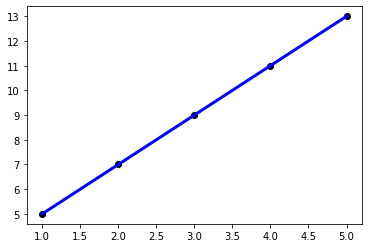

In [29]:
import matplotlib.pyplot as plt

y_true = [5, 7, 9, 11, 13]

# Plot outputs
plt.scatter(x_test, y_pred, color='black')
plt.plot(x_test, y_true, color='blue', linewidth=3)

plt.show()

### n Dimensões

In [30]:
x = np.array([[1, 1, 3], [1, 2, 1], [2, 2, 4], [2, 3, 5]])

# y = 1*x1 + 2*x2 + 5*x3 + 3
y = np.dot(x, np.array([1, 2, 5])) + 3

reg = LinearRegression().fit(x, y) 

In [31]:
reg.coef_ 

array([1., 2., 5.])

In [32]:
reg.intercept_

3.0000000000000107

### Modelo para predições

In [33]:
x_test = np.array([[1, 2, 3], [8, 9, 10], [2, 2, 4]])
y_pred = reg.predict(x_test)
y_pred

array([23., 79., 29.])

### Comparando com os valores reais

In [34]:
y_true = np.dot(x_test, np.array([1, 2, 5])) + 3
y_true

array([23, 79, 29])

### Salvar o modelo

In [35]:
import joblib
filename = 'reg.joblib'
joblib.dump(reg, filename)

['reg.joblib']

In [36]:
loaded_reg = joblib.load(filename)
loaded_reg

LinearRegression()

### Carregar e reutilizar o modelo

In [37]:
y_pred = loaded_reg.predict(x_test)
y_pred

array([23., 79., 29.])

## Limites do Modelo Linear

Construir variáveis com relação não linear

In [44]:
from sklearn.preprocessing import PolynomialFeatures

x = np.arange(6).reshape(3, 2)
x

array([[0, 1],
       [2, 3],
       [4, 5]])

In [45]:
y = np.array([100, 200, 300])

Aplicar a transformação de variáveis:
* Gerar uma nova matriz da feature consistindo de todas as combinações polinomiais da feature

In [46]:
poly = PolynomialFeatures(2)
poly.fit_transform(x)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [47]:
x_transformed = poly.fit_transform(x)

In [48]:
reg = LinearRegression().fit(x_transformed, y)

In [49]:
print(reg.coef_)
print(reg.intercept_)

[-5.32907052e-15  1.25000000e+01  1.25000000e+01 -1.25000000e+01
 -1.56329705e-14  1.25000000e+01]
74.99999999999997


## Regressão não linear

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Inicializando as variáveis independentes e dependentes
x, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)

In [52]:
x[:5]

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826,  0.3130677 , -0.85409574]])

In [53]:
y[:5]

array([49.82290745,  4.87728597, 11.91487464, 19.75307803, 23.60700003])

In [54]:
reg = RandomForestRegressor(max_depth=2, random_state=0)
reg.fit(x, y)

RandomForestRegressor(max_depth=2, random_state=0)

In [55]:
reg.predict([[1, 2, 3, 4]])

array([52.79050925])

In [56]:
reg.predict([[1, 2, 3, 4], [6, 2, 3, 5]])

array([52.79050925, 61.7155606 ])